<a href="https://colab.research.google.com/github/sujithkumar27/task-1/blob/main/tsk_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING PYTHON LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
train = '/content/drive/MyDrive/Colab Notebooks/train_data.txt'

In [11]:
train_data = pd.read_csv(train ,sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

<ipython-input-11-a1c2bbfd2624>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv(train ,sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [12]:
train_data

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
48123,48124,The Spirit of Norway House (2005),documentary,As Long As The Rivers Flow is a one-hour docu...
48124,48125,For Richer or Poorer (1997),comedy,"The incredibly rich, but miserable New York c..."
48125,48126,Retribution (2011/VII),action,"A fast-paced thrilling ride, RETRIBUTION star..."
48126,48127,Long Echo (2016),documentary,"""Long echo"" - Of the explosion not far from t..."


In [13]:
train_data.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [14]:
test = '/content/drive/MyDrive/Colab Notebooks/test_data.txt'

In [15]:
test_data = pd.read_csv(test,sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

<ipython-input-15-4217bccb5ce4>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv(test,sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [16]:
test_data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [17]:
test_data.isnull().sum()

ID                 0
TITLE              0
GENRE              0
DESCRIPTION    54200
dtype: int64

In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           54200 non-null  int64  
 1   TITLE        54200 non-null  object 
 2   GENRE        54200 non-null  object 
 3   DESCRIPTION  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB


DATA VISUALIZATION

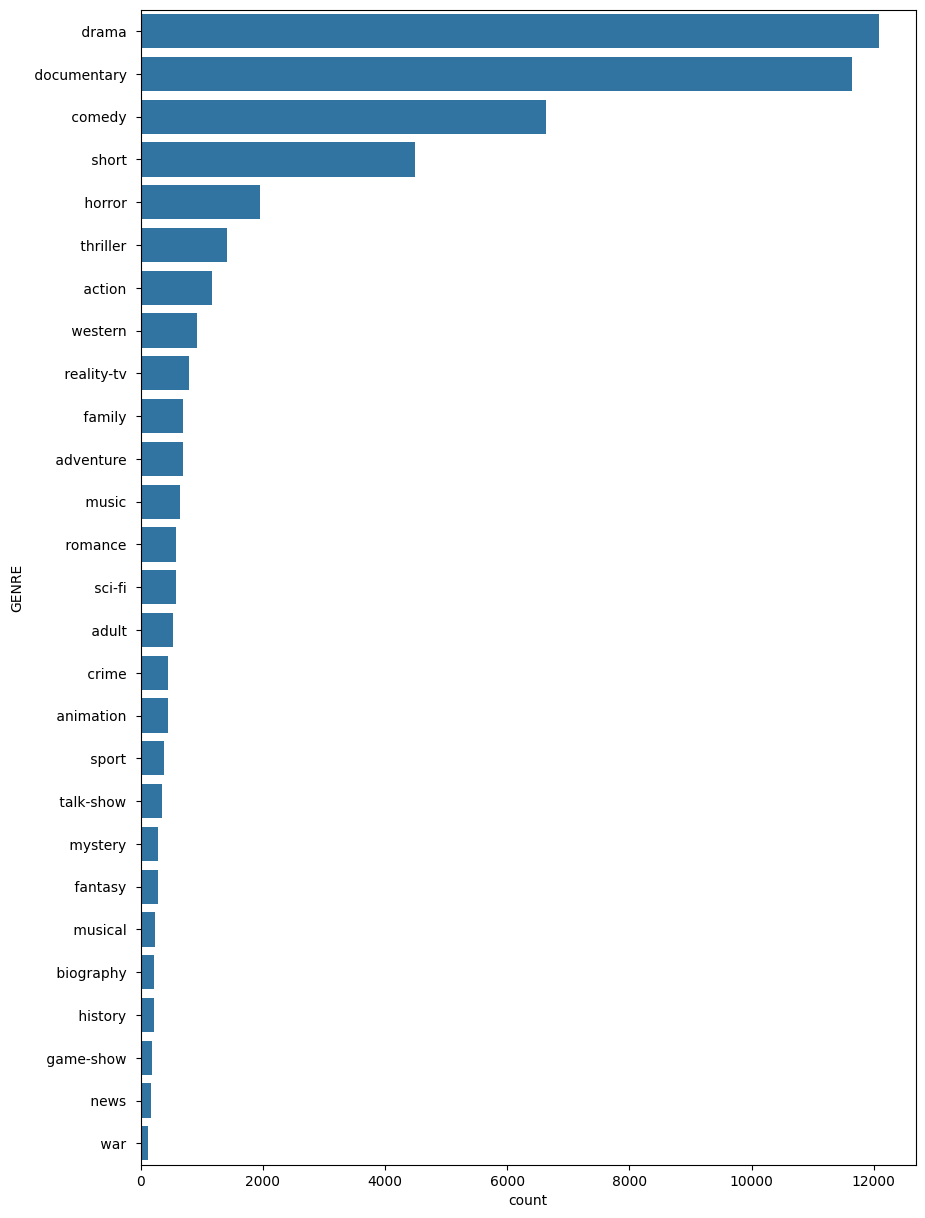

In [23]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="GENRE", order= train_data["GENRE"].value_counts().index)
plt.show()

TRAINING AND TESTING DATASET

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [27]:
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

In [28]:
tv = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = tv.fit_transform(train_data['DESCRIPTION'])
X_test = tv.transform(test_data['DESCRIPTION'])

In [30]:
testd = '/content/drive/MyDrive/Colab Notebooks/test_data_solution.txt'

In [31]:
test_solution_data = pd.read_csv(testd,sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

<ipython-input-31-62f1a247babe>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv(testd,sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [32]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

In [33]:
x_train_sub, x_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [34]:
ls = LinearSVC()
ls.fit(x_train_sub, y_train_sub)

LinearSVC()

In [35]:
y_val_pred = ls.predict(x_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5763557033035529
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.32      0.37       211
           1       0.69      0.34      0.46        96
           2       0.44      0.22      0.29       123
           3       0.40      0.12      0.18        84
           4       0.00      0.00      0.00        50
           5       0.51      0.56      0.53      1298
           6       0.20      0.05      0.08        98
           7       0.69      0.82      0.75      2363
           8       0.56      0.71      0.63      2447
           9       0.45      0.19      0.26       133
          10       0.08      0.02      0.03        61
          11       0.79      0.66      0.72        35
          12       0.00      0.00      0.00        43
          13       0.64      0.61      0.62       400
          14       0.63      0.54      0.59       123
          15       0.00      0.00      0.00        32
      

In [36]:
y_pred = ls.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
Multiclassifier = MultinomialNB()
Multiclassifier.fit(X_train, y_train)

MultinomialNB()

In [39]:
Multiclassifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logistic = LogisticRegression(max_iter=500)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [42]:
logistic.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

PREDICT THE GENRE OF THE MOVIE

In [44]:
def predict_movie(description):
    tool = tv.transform([description])
    pred_label = ls.predict(tool)
    return label_encoder.inverse_transform(pred_label)[0]

In [53]:
a = input("Enter Data : ")
print(predict_movie(a))

Enter Data : a movie where people gets scared of dark
 horror 


In [56]:
b = input("Enter Data : ")
print(predict_movie(b))

Enter Data : a movie where army fight to terrorist
 action 
